Dataset saved to classification_data.csv
   Temperature   Humidity  WindSpeed  CloudCover  Rain  Cluster
0    24.363503  75.852937   4.628323   51.908179     1        1
1    38.767858  62.887709  13.547524   47.918188     0        0
2    33.299849  44.762209  21.823646    2.564207     0        0
3    29.966462  85.103602  18.305622   34.124783     0        0
4    18.900466  74.778494  20.164029   38.019562     0        1


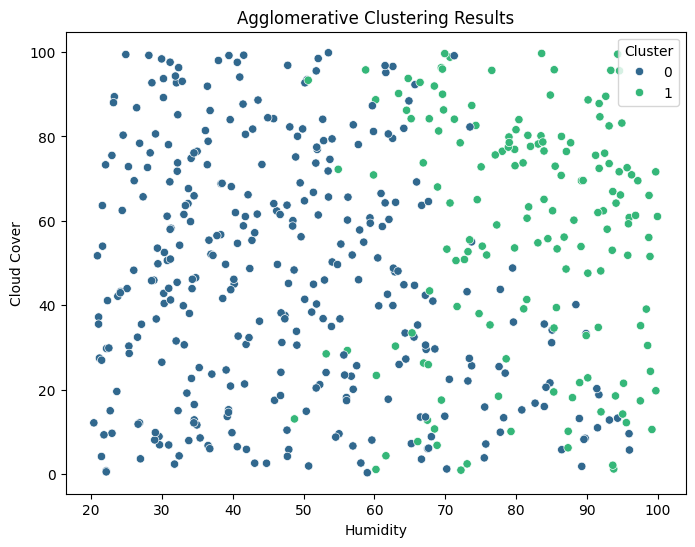

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Define dataset size
num_samples = 500

# Generate synthetic weather data
temperature = np.random.uniform(15, 40, num_samples)  # Temperature in °C
humidity = np.random.uniform(20, 100, num_samples)    # Humidity in percentage
wind_speed = np.random.uniform(0, 25, num_samples)    # Wind Speed in km/h
cloud_cover = np.random.uniform(0, 100, num_samples)  # Cloud Cover in percentage

# Generate 'Rain' as target variable (0 for no rain, 1 for rain)
# Rain is more likely if Humidity > 70 and CloudCover > 50
rain = (humidity > 70) & (cloud_cover > 50)
rain = rain.astype(int)

# Create a DataFrame
weather_data = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'WindSpeed': wind_speed,
    'CloudCover': cloud_cover,
    'Rain': rain
})

# Save dataset to CSV
file_path = "classification_data.csv"
weather_data.to_csv(file_path, index=False)
print(f"Dataset saved to {file_path}")

# Display first few rows
weather_data.head()

# Load dataset
weather_data = pd.read_csv("classification_data.csv")

# Prepare the data
X = weather_data[['Temperature', 'Humidity', 'WindSpeed', 'CloudCover']]  # Features
# Unsupervised so no labels

# Scale the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=2)  # Assuming we want 2 clusters
cluster_labels = model.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame for analysis
weather_data['Cluster'] = cluster_labels

# Display the first few rows with cluster labels
print(weather_data.head())

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=weather_data['Humidity'], 
    y=weather_data['CloudCover'], 
    hue=weather_data['Cluster'], 
    palette='viridis'
)
plt.title("Agglomerative Clustering Results")
plt.xlabel("Humidity")
plt.ylabel("Cloud Cover")
plt.legend(title="Cluster")
plt.show()